<a href="https://colab.research.google.com/github/veeruamma/Face-Biometrics/blob/main/Face%20Detection%20using%20MTCNN%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MTCNN : Multi Class Cascaded CNN
It does multi tasks such as
1. Face classification
2. BoudingBox regression
3. Landmarks detection


In [ ]:
!pip install mtcnn #Multi task cascaded CNN

In [ ]:
cd /content/drive/MyDrive/LEARNING/Face Biometrics

/content/drive/MyDrive/LEARNING/Face Biometrics


In [67]:
!wget -O dataset/Modi.jpg https://upload.wikimedia.org/wikipedia/commons/2/2e/Prime_Minister%2C_Shri_Narendra_Modi%2C_in_New_Delhi_on_August_08%2C_2019_%28cropped%29.jpg
!wget -O dataset/Amitabh1.jpg https://images.hindustantimes.com/rf/image_size_630x354/HT/p2/2020/10/01/Pictures/amitabh-bachchan-tested-negative-for-covid-19_c4324d6a-03ca-11eb-be8a-af0c9ba615fa.jpg
!wget -O dataset/sachin.jpg https://www.biographyonline.net/wp-content/uploads/2014/05/Sachin_tendulkar1.jpg

--2021-04-12 06:41:49--  https://upload.wikimedia.org/wikipedia/commons/2/2e/Prime_Minister%2C_Shri_Narendra_Modi%2C_in_New_Delhi_on_August_08%2C_2019_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408943 (399K) [image/jpeg]
Saving to: ‘dataset/Modi.jpg’

dataset/Modi.jpg    100%[===================>] 399.36K  1.97MB/s    in 0.2s    

2021-04-12 06:41:50 (1.97 MB/s) - ‘dataset/Modi.jpg’ saved [408943/408943]

--2021-04-12 06:41:50--  https://images.hindustantimes.com/rf/image_size_630x354/HT/p2/2020/10/01/Pictures/amitabh-bachchan-tested-negative-for-covid-19_c4324d6a-03ca-11eb-be8a-af0c9ba615fa.jpg
Resolving images.hindustantimes.com (images.hindustantimes.com)... 23.77.2.176, 2600:1417:76:196::1833, 2600:1417:76:1a0::1833
Connecting to images.hindustantimes.com (images.h

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2

In [68]:
image = cv2.imread('dataset/sachin.jpg')
image_m = cv2.imread('dataset/Modi.jpg')
image_a = cv2.imread('dataset/Amitabh1.jpg')

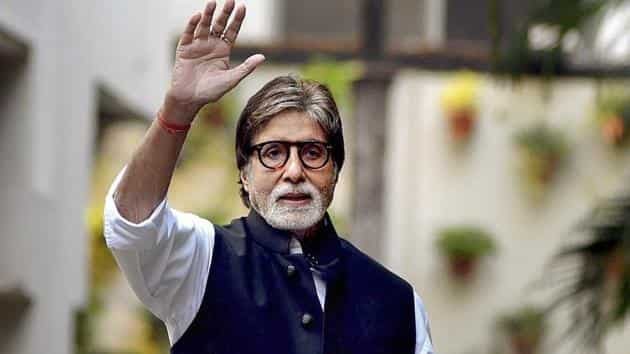

In [69]:
from google.colab.patches import cv2_imshow
cv2_imshow(image_a)

In [70]:
detector = MTCNN()

In [71]:
faces = detector.detect_faces(image_a)
for face in faces:
  print(face)

{'box': [248, 111, 90, 115], 'confidence': 0.9998928308486938, 'keypoints': {'left_eye': (273, 153), 'right_eye': (314, 154), 'nose': (294, 175), 'mouth_left': (277, 199), 'mouth_right': (313, 199)}}


In [72]:
def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0]+bounding_box[2], bounding_box[1]+bounding_box[3]),
                 (0, 155,255),2)
                
  cv2.circle(image, (keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(image, (keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(image, (keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(image, (keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(image, (keypoints['mouth_right']), 2, (0,155,255), 2)
  return image


In [73]:
marked_image = create_bbox(image)

marked_image_m = create_bbox(image_m)
marked_image_a = create_bbox(image_a)

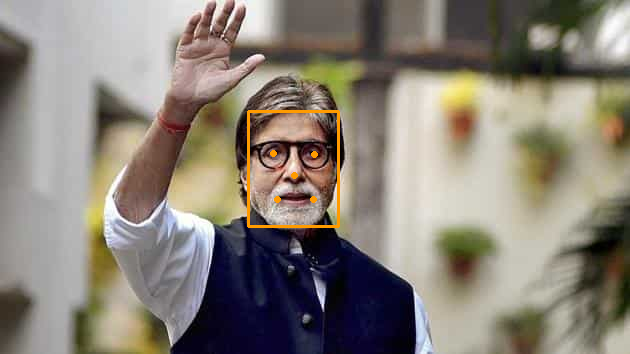

In [74]:
cv2_imshow(marked_image_a)

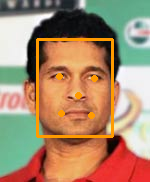

In [54]:
imag_m = cv2.imread('dataset/sachin.jpg')
marked_image = create_bbox(imag_m)
cv2_imshow(marked_image)

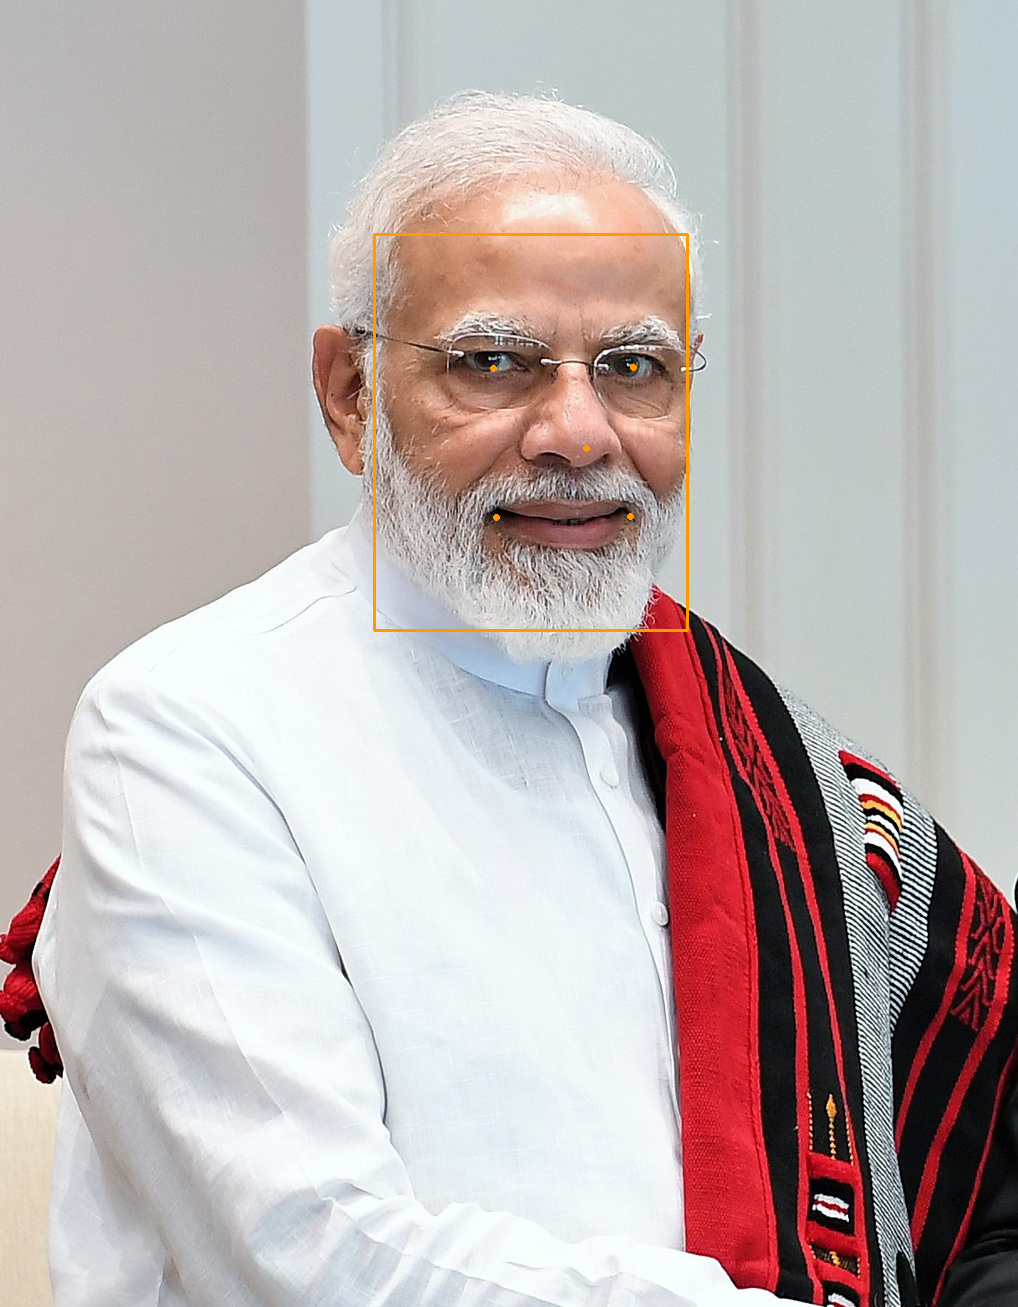

In [76]:
marked_image = create_bbox(cv2.imread('dataset/Modi.jpg'))
cv2_imshow(marked_image)